<a href="https://colab.research.google.com/github/the-cryptozoologist/data-science/blob/main/biomedical/ekg-signals.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Denoising EKG signals

In [24]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

from google.colab import files

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [25]:
path ="/content/drive/MyDrive/Colab Notebooks/Projects/denoisingSignals/EKG_signals.csv"

In [43]:
df = pd.read_csv(path, names = ["noisy", "original"])

In [44]:
df.head()

,noisy,original
0,920.23,963
1,929.06,987
2,1116.60,1024
3,1073.60,1073
4,1070.60,1134


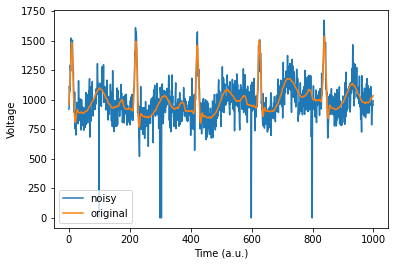

In [45]:
df.plot(fontsize=10)
plt.xlabel("Time (a.u.)")
plt.ylabel("Voltage")
plt.show()

In [85]:
filtered = df["noisy"].tolist()

In [78]:
# Median filter (for small values)

thresh = 321

subthresh = np.where(df["noisy"]<thresh)[0]
print(subthresh)

k = 7

for i in subthresh:
    filtered[i] = np.median(filtered[np.max((0,i-k)):np.min((len(filtered),i+k))])   

df["filtered"] = filtered

[ 99 299 304 599 799]


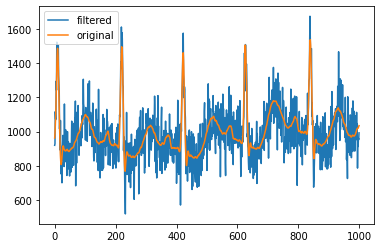

In [79]:
df[["filtered","original"]].plot()

In [82]:
# Mean filter

k = 7

for i in range(len(df)):
    filtered[i] = np.mean(filtered[np.max((0,i-k)):np.min((len(filtered),i+k))])   

In [81]:
df["filtered"] = filtered
df.head()

,noisy,original,filtered
0,920.23,963,1092.255714
1,929.06,987,1167.476964
2,1116.60,1024,1217.592520
3,1073.60,1073,1248.492520
4,1070.60,1134,1280.265247


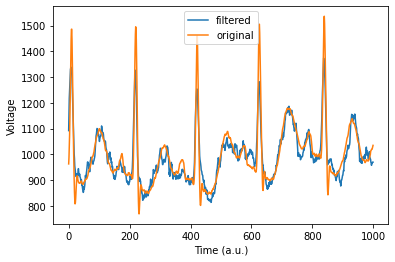

In [84]:
df[["filtered","original"]].plot(fontsize=10)
plt.xlabel("Time (a.u.)")
plt.ylabel("Voltage")
plt.show()